In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df_covid = pd.read_csv('covidnumber.csv',index_col=0) #Loading in daily health data for covid infection

In [3]:
df_covid['Reporting_PHU'].nunique() #Confirming all 34 PHUs 

34

In [4]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473901 entries, 0 to 473900
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Accurate_Episode_Date      473901 non-null  object 
 1   Case_Reported_Date         473901 non-null  object 
 2   Test_Reported_Date         461350 non-null  object 
 3   Specimen_Date              471573 non-null  object 
 4   Age_Group                  473901 non-null  object 
 5   Client_Gender              473901 non-null  object 
 6   Case_AcquisitionInfo       473901 non-null  object 
 7   Outcome1                   473901 non-null  object 
 8   Outbreak_Related           82320 non-null   object 
 9   Reporting_PHU_ID           473901 non-null  int64  
 10  Reporting_PHU              473901 non-null  object 
 11  Reporting_PHU_Address      473901 non-null  object 
 12  Reporting_PHU_City         473901 non-null  object 
 13  Reporting_PHU_Postal_Code  47

In [5]:
df_covid = df_covid.drop(['Case_Reported_Date','Test_Reported_Date','Specimen_Date','Case_AcquisitionInfo','Reporting_PHU_Address','Reporting_PHU_Website'],axis=1)

In [6]:
df_covid.head() #Dropped columns without useful information 

,Accurate_Episode_Date,Age_Group,Client_Gender,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,2020-06-16T00:00:00,20s,MALE,Resolved,NaN,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
1,2020-04-10T00:00:00,60s,FEMALE,Resolved,NaN,2236,Halton Region Health Department,Oakville,L6M 3Ll,43.413997,-79.744796
2,2020-04-19T00:00:00,40s,FEMALE,Resolved,Yes,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
3,2020-04-23T00:00:00,30s,FEMALE,Resolved,NaN,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
4,2020-06-04T00:00:00,60s,FEMALE,Resolved,NaN,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893


In [7]:
df_covid.columns

Index(['Accurate_Episode_Date', 'Age_Group', 'Client_Gender', 'Outcome1',
       'Outbreak_Related', 'Reporting_PHU_ID', 'Reporting_PHU',
       'Reporting_PHU_City', 'Reporting_PHU_Postal_Code',
       'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'],
      dtype='object')

In [8]:
df_covid.head()

,Accurate_Episode_Date,Age_Group,Client_Gender,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,2020-06-16T00:00:00,20s,MALE,Resolved,NaN,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
1,2020-04-10T00:00:00,60s,FEMALE,Resolved,NaN,2236,Halton Region Health Department,Oakville,L6M 3Ll,43.413997,-79.744796
2,2020-04-19T00:00:00,40s,FEMALE,Resolved,Yes,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
3,2020-04-23T00:00:00,30s,FEMALE,Resolved,NaN,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
4,2020-06-04T00:00:00,60s,FEMALE,Resolved,NaN,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893


In [9]:
df_covid['Outbreak_Related'].unique() #Checking inputs into columns 

array([nan, 'Yes'], dtype=object)

In [10]:
df_covid['Outcome1'].unique()   #Checking outcome of individual cases 

array(['Resolved', 'Fatal', 'Not Resolved'], dtype=object)

In [11]:
df_covid['Accurate_Episode_Date'].value_counts().reset_index()  #Aggregating daily Covid cases 

,index,Accurate_Episode_Date
0,2021-04-07T00:00:00,4707
1,2021-04-06T00:00:00,4658
2,2021-04-05T00:00:00,4646
3,2021-04-09T00:00:00,4507
4,2021-04-12T00:00:00,4454
...,...,...
455,2020-01-21T00:00:00,1
456,2020-01-10T00:00:00,1
457,2020-02-05T00:00:00,1
458,2020-02-21T00:00:00,1


## Aggregated number of Covid cases from various Ontario Public Health Units 

In [12]:
df_bar = df_covid['Reporting_PHU'].value_counts().reset_index().rename(columns={'index':'Reporting_PHU', 'Reporting_PHU':'num_cases'})
df_bar

,Reporting_PHU,num_cases
0,Toronto Public Health,145999
1,Peel Public Health,94168
2,York Region Public Health Services,46843
3,Ottawa Public Health,24612
4,Durham Region Health Department,21230
5,Hamilton Public Health Services,17661
6,Windsor-Essex County Health Unit,15549
7,Halton Region Health Department,14904
8,"Region of Waterloo, Public Health",14368
9,Niagara Region Public Health Department,14055


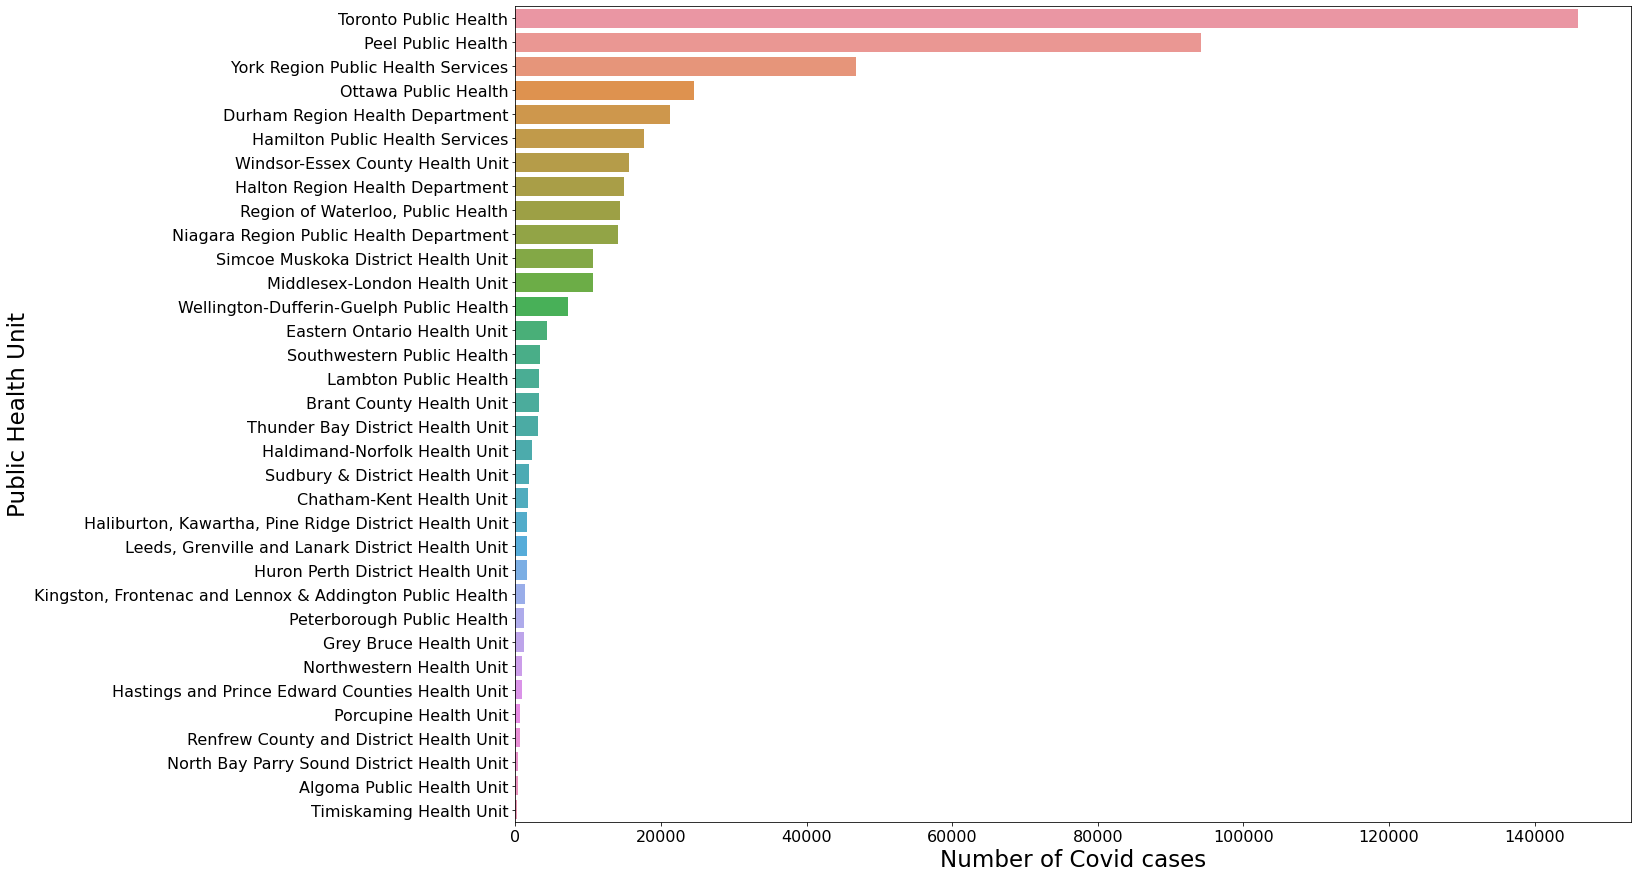

In [13]:
plt.figure(figsize=(20,15))
sns.barplot(y=df_bar['Reporting_PHU'], x= df_bar['num_cases'])
plt.ylabel('Public Health Unit',fontsize=23)
plt.xlabel('Number of Covid cases',fontsize=23)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [14]:
df_gender = df_covid[~df_covid['Client_Gender'].isin(['UNSPECIFIED','GENDER DIVERSE'])]  #Covid Cases per Gender 

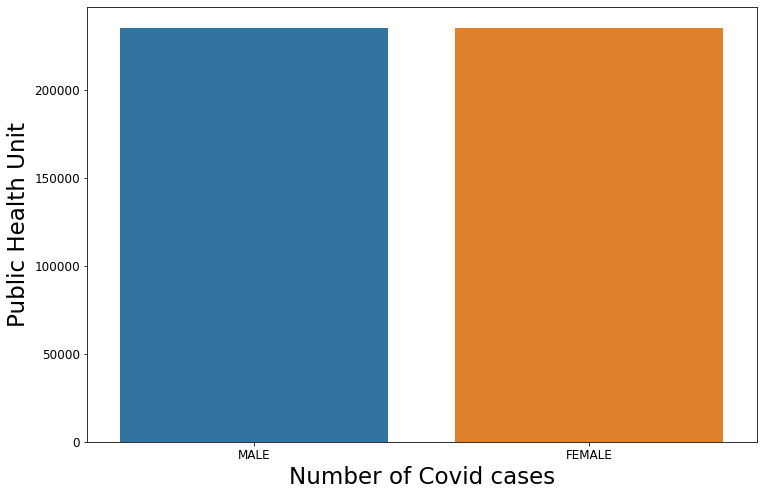

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x=df_gender['Client_Gender'])
plt.ylabel('Public Health Unit',fontsize=23)
plt.xlabel('Number of Covid cases',fontsize=23)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [16]:
df_covid['Outbreak_Related'] = np.where(df_covid['Outbreak_Related']=='Yes','Yes','Unknown') #Cleaning up data 

In [17]:
df_covid['Outbreak_Related'].value_counts()

Unknown    391581
Yes         82320
Name: Outbreak_Related, dtype: int64

### PROPORTION OF COVID CASES LINKED TO OUTBREAKS 

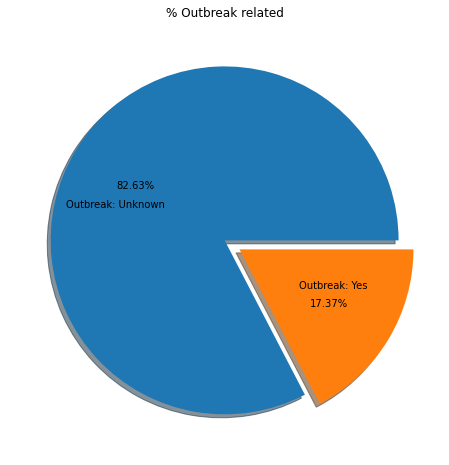

In [18]:
plt.figure(figsize=(12,8))
plt.title('% Outbreak related')
plt.pie(df_covid['Outbreak_Related'].value_counts(),explode=(0,0.1),labels = ['Outbreak: Unknown','Outbreak: Yes'],shadow=True, autopct='%.2f%%', labeldistance=0.4)
plt.show()

### COVID CASES BY AGE DISTRIBUTION 

In [19]:
df_age= df_covid[~df_covid['Age_Group'].isin(['UNKNOWN'])]

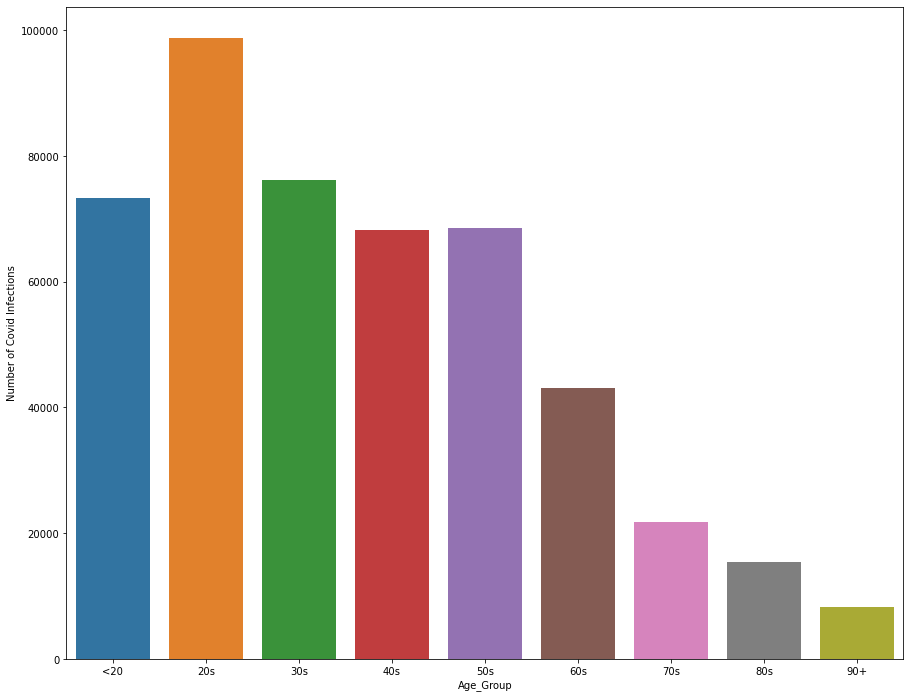

In [20]:
plt.figure(figsize=(15,12))
sns.countplot(x=df_age['Age_Group'],order=['<20','20s','30s','40s','50s','60s','70s','80s','90+'])
plt.ylabel('Number of Covid Infections')
plt.show()

In [21]:
df_age.groupby(['Age_Group']).count()['Accurate_Episode_Date']

Age_Group
20s    98841
30s    76162
40s    68195
50s    68605
60s    43126
70s    21855
80s    15394
90+     8286
<20    73324
Name: Accurate_Episode_Date, dtype: int64

## CHECKING FATALITY RATE PER AGE GROUP 

In [22]:
df_healthstatus= (100 * df_age.groupby(['Age_Group','Outcome1']).count()['Accurate_Episode_Date']/df_age.groupby(['Age_Group']).count()['Accurate_Episode_Date']).reset_index()

In [23]:
df_healthstatus

,Age_Group,Outcome1,Accurate_Episode_Date
0,20s,Fatal,0.016188
1,20s,Not Resolved,7.855040
2,20s,Resolved,92.128772
3,30s,Fatal,0.047268
4,30s,Not Resolved,8.346682
5,30s,Resolved,91.606050
6,40s,Fatal,0.120243
7,40s,Not Resolved,8.047511
8,40s,Resolved,91.832246
9,50s,Fatal,0.443116


In [1]:
## OUTCOME DISTRIBUTION FOR COVID CASES 

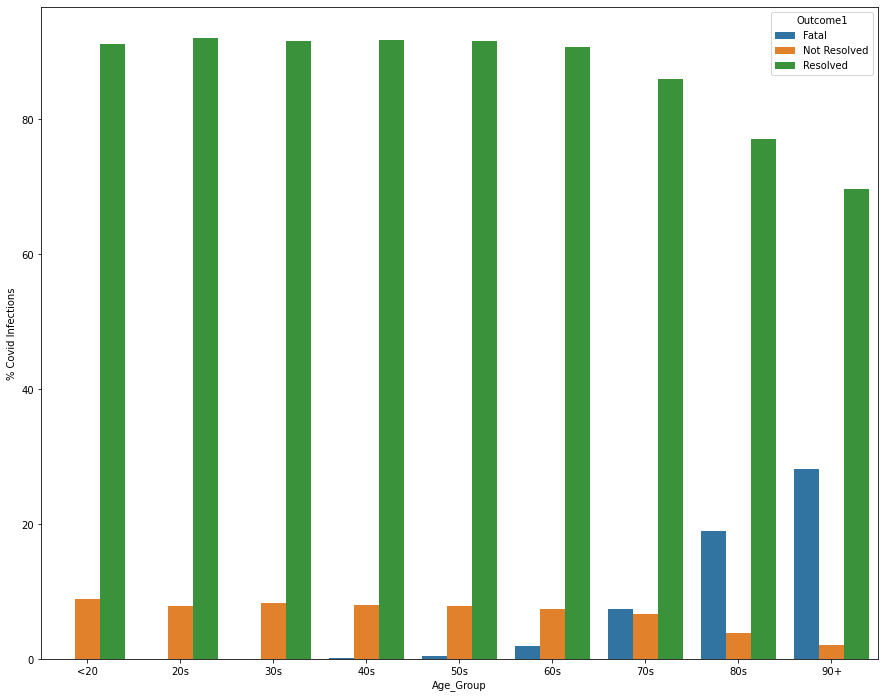

In [24]:
plt.figure(figsize=(15,12))
sns.barplot(x='Age_Group', y='Accurate_Episode_Date', hue='Outcome1',data=df_healthstatus,order=['<20','20s','30s','40s','50s','60s','70s','80s','90+'])
plt.ylabel('% Covid Infections')
plt.show()

In [26]:
df_covid 

,Accurate_Episode_Date,Age_Group,Client_Gender,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,2020-06-16T00:00:00,20s,MALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
1,2020-04-10T00:00:00,60s,FEMALE,Resolved,Unknown,2236,Halton Region Health Department,Oakville,L6M 3Ll,43.413997,-79.744796
2,2020-04-19T00:00:00,40s,FEMALE,Resolved,Yes,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
3,2020-04-23T00:00:00,30s,FEMALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
4,2020-06-04T00:00:00,60s,FEMALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
...,...,...,...,...,...,...,...,...,...,...,...
473896,2021-04-11T00:00:00,30s,FEMALE,Resolved,Unknown,2244,Middlesex-London Health Unit,London,N6A 5L7,42.981468,-81.254016
473897,2021-04-13T00:00:00,50s,FEMALE,Resolved,Unknown,2246,Niagara Region Public Health Department,Thorold,L2V 4T7,43.116537,-79.241220
473898,2021-04-19T00:00:00,50s,MALE,Not Resolved,Unknown,2244,Middlesex-London Health Unit,London,N6A 5L7,42.981468,-81.254016
473899,2021-04-20T00:00:00,60s,MALE,Not Resolved,Unknown,3895,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358


In [2]:
#COVID CASES ON DAILY BASIS PER PHU 

In [27]:
df_b =(df_covid.groupby(['Reporting_PHU','Accurate_Episode_Date']).count()['Reporting_PHU_Latitude']).reset_index()

In [28]:
df_b

,Reporting_PHU,Accurate_Episode_Date,Reporting_PHU_Latitude
0,Algoma Public Health Unit,2020-03-08T00:00:00,1
1,Algoma Public Health Unit,2020-03-15T00:00:00,1
2,Algoma Public Health Unit,2020-03-20T00:00:00,2
3,Algoma Public Health Unit,2020-03-22T00:00:00,2
4,Algoma Public Health Unit,2020-03-23T00:00:00,2
...,...,...,...
10746,York Region Public Health Services,2021-04-28T00:00:00,190
10747,York Region Public Health Services,2021-04-29T00:00:00,140
10748,York Region Public Health Services,2021-04-30T00:00:00,170
10749,York Region Public Health Services,2021-05-01T00:00:00,112


## DAILY HOSPITALIZATION DATA PER HEALTH REGION 

In [29]:
hosp_df = pd.read_csv('hosptalizationdata.csv',index_col=0) 

In [30]:
hosp_df.head()

,_id,date,oh_region,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,1,2020-04-02T00:00:00,CENTRAL,51,39,113,0,0,0,0
1,2,2020-04-03T00:00:00,CENTRAL,57,52,141,0,0,0,0
2,3,2020-04-04T00:00:00,CENTRAL,65,57,143,0,0,0,0
3,4,2020-04-05T00:00:00,CENTRAL,65,55,174,0,0,0,0
4,942,2020-08-30T00:00:00,NORTH,0,0,0,0,0,0,0


## DAILY COVID CASES 

In [31]:
df_covid.head()

,Accurate_Episode_Date,Age_Group,Client_Gender,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,2020-06-16T00:00:00,20s,MALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
1,2020-04-10T00:00:00,60s,FEMALE,Resolved,Unknown,2236,Halton Region Health Department,Oakville,L6M 3Ll,43.413997,-79.744796
2,2020-04-19T00:00:00,40s,FEMALE,Resolved,Yes,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
3,2020-04-23T00:00:00,30s,FEMALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
4,2020-06-04T00:00:00,60s,FEMALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893


## PUBLIC HEALTH UNITS, HEALTH REGIONS AND POPULATION 

In [32]:
df_region = pd.read_csv('city_healthregion.csv')

In [33]:
df_region.head()

,Region,Segment_type,Population,Aff_region,mapped_region
0,Cobalt,Town,"1,133",Timiskaming Health Unit,North
1,Englehart,Town,"1,519",Timiskaming Health Unit,North
2,Kirkland Lake,Town,"8,133",Timiskaming Health Unit,North
3,Latchford,Town,387,Timiskaming Health Unit,North
4,Temiskaming Shores,City,"10,400",Timiskaming Health Unit,North


In [34]:
duplicated_df = df_region[df_region[['Region','Segment_type','Population']].duplicated()]

In [35]:
ab_region  = df_region[['Region','Segment_type','Population']].drop_duplicates(keep='first')

In [36]:
df_new_region = ab_region.merge(df_region[['Aff_region','mapped_region']],left_index=True,right_index=True).reset_index(drop=True)

In [37]:
sorted(df_new_region['Aff_region'].unique())

['Brant County Health Unit',
 'Central Health Integration Network',
 'Central West Health Integration Network',
 'City of Hamilton Health Unit',
 'City of Ottawa Health Unit',
 'District of Algoma Health Unit',
 'Durham Regional Health Unit',
 'Eastern Ontario Health Unit',
 'Elgin-St. Thomas Health Unit',
 'Grey Bruce Health Unit',
 'Haldimand-Norfolk Health Unit',
 'Haliburton, Kawartha, Pine Ridge District Health Unit',
 'Halton Regional Health Unit',
 'Hastings and Prince Edward Counties Health Unit',
 'Huron County Health Unit',
 'Kingston, Frontenac and Lennox and Addington Health Unit',
 'Lambton Health Unit',
 'Leeds, Grenville and Lanark District Health Unit',
 'Middlesex-London Health Unit',
 'Niagara Regional Area Health Unit',
 'North Bay Parry Sound District Health Unit',
 'North Simcoe Muskoka Health Integration Network',
 'Northwestern Health Unit',
 'Oxford County Health Unit',
 'Perth District Health Unit',
 'Peterborough County-City Health Unit',
 'Porcupine Health Un

In [38]:
#pd.DataFrame(df_covid['Reporting_PHU'].unique(),columns=['Unit']).to_csv('unit_excel.csv',index=False)

In [39]:
#df_region[['Aff_region','mapped_region']].to_csv('unit4_excel.csv',index=False)

In [40]:
df_rgn = pd.read_csv('unit_excel.csv')

In [41]:
df_rgn

,Unit,mapped_region
0,Peel Public Health,Central
1,Halton Region Health Department,Central
2,Wellington-Dufferin-Guelph Public Health,Central
3,"Kingston, Frontenac and Lennox & Addington Pub...",East
4,Toronto Public Health,Toronto
5,"Region of Waterloo, Public Health",Central
6,Niagara Region Public Health Department,Central
7,Hamilton Public Health Services,Central
8,Durham Region Health Department,Central
9,Middlesex-London Health Unit,West


In [43]:
df_rgn['mapped_region'].value_counts()

Central    13
North       7
West        6
East        6
Toronto     1
Name: mapped_region, dtype: int64

## MERGING DAILY CASES TO HEALTH REGIONS 

In [44]:
df_main = df_covid.merge(df_rgn,how='left', left_on='Reporting_PHU', right_on='Unit')

In [45]:
df_main.drop(['Unit'],axis=1, inplace=True)

In [46]:
df_main.head()

,Accurate_Episode_Date,Age_Group,Client_Gender,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude,mapped_region
0,2020-06-16T00:00:00,20s,MALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central
1,2020-04-10T00:00:00,60s,FEMALE,Resolved,Unknown,2236,Halton Region Health Department,Oakville,L6M 3Ll,43.413997,-79.744796,Central
2,2020-04-19T00:00:00,40s,FEMALE,Resolved,Yes,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central
3,2020-04-23T00:00:00,30s,FEMALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central
4,2020-06-04T00:00:00,60s,FEMALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central


In [47]:
df_main['Accurate_Episode_Date']= df_main['Accurate_Episode_Date'].str.split('T',expand=True)[0] #Cleaning up the data column 

In [48]:
df_main

,Accurate_Episode_Date,Age_Group,Client_Gender,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude,mapped_region
0,2020-06-16,20s,MALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central
1,2020-04-10,60s,FEMALE,Resolved,Unknown,2236,Halton Region Health Department,Oakville,L6M 3Ll,43.413997,-79.744796,Central
2,2020-04-19,40s,FEMALE,Resolved,Yes,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central
3,2020-04-23,30s,FEMALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central
4,2020-06-04,60s,FEMALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central
...,...,...,...,...,...,...,...,...,...,...,...,...
473896,2021-04-11,30s,FEMALE,Resolved,Unknown,2244,Middlesex-London Health Unit,London,N6A 5L7,42.981468,-81.254016,West
473897,2021-04-13,50s,FEMALE,Resolved,Unknown,2246,Niagara Region Public Health Department,Thorold,L2V 4T7,43.116537,-79.241220,Central
473898,2021-04-19,50s,MALE,Not Resolved,Unknown,2244,Middlesex-London Health Unit,London,N6A 5L7,42.981468,-81.254016,West
473899,2021-04-20,60s,MALE,Not Resolved,Unknown,3895,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358,Toronto


In [49]:
hosp_df.head()

,_id,date,oh_region,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,1,2020-04-02T00:00:00,CENTRAL,51,39,113,0,0,0,0
1,2,2020-04-03T00:00:00,CENTRAL,57,52,141,0,0,0,0
2,3,2020-04-04T00:00:00,CENTRAL,65,57,143,0,0,0,0
3,4,2020-04-05T00:00:00,CENTRAL,65,55,174,0,0,0,0
4,942,2020-08-30T00:00:00,NORTH,0,0,0,0,0,0,0


In [51]:
hosp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
_id,1980.0,990.500000,571.721086,1.0,495.75,990.5,1485.25,1980.0
ICU,1980.0,41.310606,47.341747,0.0,5.00,24.0,62.00,268.0
ICU_vented,1980.0,28.211111,33.431397,0.0,3.00,15.5,44.00,202.0
hospitalizations,1980.0,141.021717,160.267166,0.0,16.00,94.0,203.00,974.0
icu_crci_total,1980.0,41.773232,50.809054,0.0,4.00,20.0,65.00,287.0
icu_crci_total_vented,1980.0,27.850505,35.344659,0.0,2.00,12.0,43.00,207.0
icu_former_covid,1980.0,3.951515,4.484961,0.0,0.00,2.0,6.00,24.0
icu_former_covid_vented,1980.0,2.373737,3.076212,-1.0,0.00,1.0,4.00,21.0


In [94]:
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   _id                      1980 non-null   int64         
 1   date                     1980 non-null   datetime64[ns]
 2   oh_region                1980 non-null   object        
 3   ICU                      1980 non-null   int64         
 4   ICU_vented               1980 non-null   int64         
 5   hospitalizations         1980 non-null   int64         
 6   icu_crci_total           1980 non-null   int64         
 7   icu_crci_total_vented    1980 non-null   int64         
 8   icu_former_covid         1980 non-null   int64         
 9   icu_former_covid_vented  1980 non-null   int64         
 10  month                    1980 non-null   object        
 11  year                     1980 non-null   int64         
dtypes: datetime64[ns](1), int64(9), ob

* date   --- date
* OH region -- oh_region 
* current hospitalizations with COVID-19 -- hospitalization 
* current patients in Intensive Care Units (ICUs) due to COVID-related critical Illness -- icu_crci_total 
* current patients in Intensive Care Units (ICUs) testing positive for COVID -- ICU 
* current patients in Intensive Care Units (ICUs) no longer testing positive for COVID -- icu_former_covid
* current patients in Intensive Care Units (ICUs) on ventilators due to COVID-related critical illness -- icu_crci_total_vented
* current patients in Intensive Care Units (ICUs) on ventilators testing positive for COVID -- icu_vented
* current patients in Intensive Care Units (ICUs) on ventilators no longer testing positive for COVID -- icu_former_covid_vented

In [4]:
#hosp_df['date'] = pd.to_datetime(hosp_df['date'].str.split('T',expand=True)[0])

In [96]:
cols = ['date','oh_region','','month','year']

In [53]:
hosp_df.tail()

,_id,date,oh_region,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
1975,1976,2021-04-29,WEST,261,194,572,278,203,17,9
1976,1977,2021-04-30,WEST,262,197,583,279,203,17,6
1977,1978,2021-05-01,WEST,261,202,561,279,207,18,5
1978,1979,2021-05-02,WEST,268,195,532,287,200,19,5
1979,1980,2021-05-03,WEST,264,198,523,283,207,19,9


In [54]:
from datetime import datetime

In [55]:
hosp_df['month']= hosp_df['date'].dt.month_name()

In [56]:
hosp_df['year']= hosp_df['date'].dt.year

In [57]:
agg_hosp_df = hosp_df.groupby(['date']).sum()[['hospitalizations','ICU','ICU_vented','icu_crci_total','icu_crci_total_vented']]

In [58]:
agg_hosp_df  #ONTARIO AGGREGATED HOSPITALIZATION DATA 

,hospitalizations,ICU,ICU_vented,icu_crci_total,icu_crci_total_vented
date,,,,,
2020-04-02,407,167,112,0,0
2020-04-03,446,194,140,0,0
2020-04-04,475,190,149,0,0
2020-04-05,508,200,154,0,0
2020-04-06,576,216,160,0,0
...,...,...,...,...,...
2021-04-29,2248,825,579,884,620
2021-04-30,2201,817,591,883,632
2021-05-01,2152,828,593,900,637


## DAILY VENTILATOR DEMAND FOR EACH HEALTH REGION  

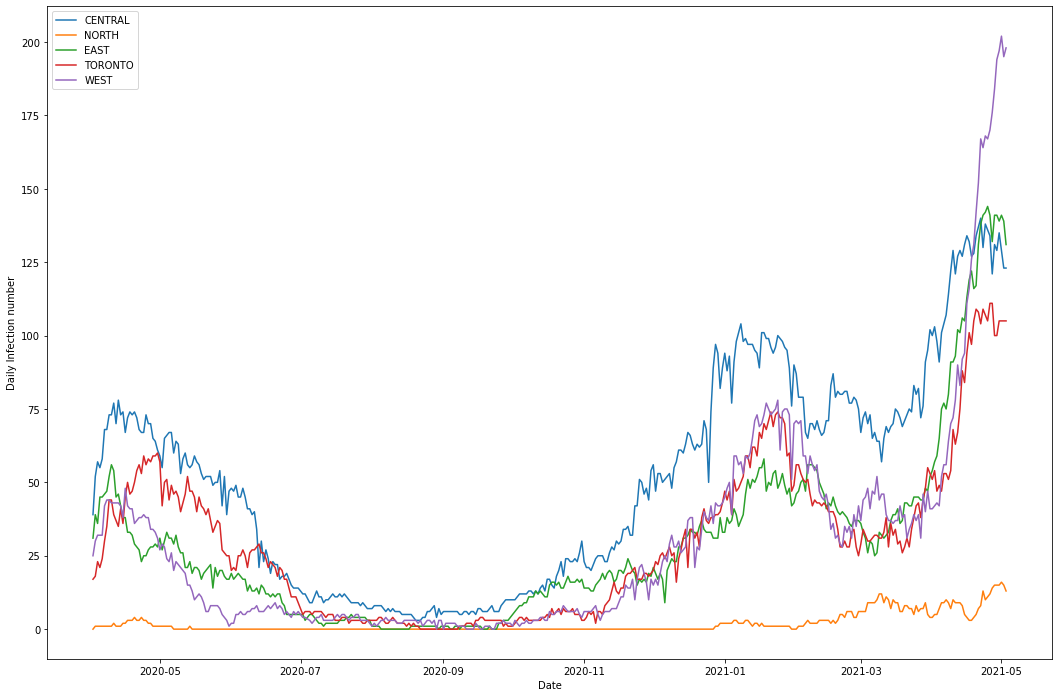

In [60]:
plt.figure(figsize=(18,12))
sns.lineplot(x=hosp_df['date'],y=hosp_df['ICU_vented'],color='black',hue=hosp_df['oh_region'])
#sns.lineplot(x=hosp_df['date'],y=hosp_df['ICU'],color='black')
plt.xlabel('Date')
plt.ylabel('Daily Ventilator demand')
#plt.title('')
plt.legend()
plt.show()

In [6]:
#df_main[df_main['mapped_region'] == 'NaN']

## DAILY MORTALITY NUMBER PER HEALTH REGION 

In [100]:
mortality_df = df_main[df_main['Outcome1']=='Fatal'].groupby(['Accurate_Episode_Date','mapped_region']).count()['Outcome1'].reset_index()

In [125]:
mortality_df

,Accurate_Episode_Date,mapped_region,Outcome1
0,2020-03-01,Central,1
1,2020-03-01,West,1
2,2020-03-04,Central,2
3,2020-03-05,Central,1
4,2020-03-05,Toronto,1
...,...,...,...
1204,2021-04-25,East,2
1205,2021-04-25,West,1
1206,2021-04-26,Central,2
1207,2021-04-26,Toronto,1


In [105]:
map  = df_main[['mapped_region','Reporting_PHU_Longitude','Reporting_PHU_Latitude']].drop_duplicates().sort_values(by='mapped_region')

In [104]:
#remove the Nan, it is west region

In [108]:
map_central = map[map['mapped_region'] == 'Central']
map_central

,mapped_region,Reporting_PHU_Longitude,Reporting_PHU_Latitude
0,Central,-79.708893,43.647471
542,Central,-80.274374,43.151811
401,Central,-78.321347,44.301632
339,Central,-80.520913,43.462876
310,Central,-78.285792,43.968173
281,Central,-79.480239,44.048023
279,Central,-79.686306,44.410713
336,Central,-80.303815,42.847825
109,Central,-80.233743,43.524881
84,Central,-79.871341,43.257631


In [114]:
import math
def midpoints(map_central):
    '''
    Takes a Series containing Longitude and Latitude 
    and calculating the geographical midpoint.
    
    '''
 

    x = 0.0
    y = 0.0
    z = 0.0

    for i, coord in map_central.iterrows():
        latitude = math.radians(coord.Reporting_PHU_Latitude)
        longitude = math.radians(coord.Reporting_PHU_Longitude)

        x += math.cos(latitude) * math.cos(longitude)
        y += math.cos(latitude) * math.sin(longitude)
        z += math.sin(latitude)

    total = len(map_central)

    x = x / total
    y = y / total
    z = z / total

    central_longitude = math.atan2(y, x)
    central_square_root = math.sqrt(x * x + y * y)
    central_latitude = math.atan2(z, central_square_root)

    mean_location = {
        'latitude': math.degrees(central_latitude),
        'longitude': math.degrees(central_longitude)
        }
    return mean_location

In [123]:
midpoints(map_central)['latitude']

43.62133402487723

In [153]:
map_west = map[map['mapped_region'] == 'West']
map_west

map_east = map[map['mapped_region'] == 'East']
map_east

map_north = map[map['mapped_region'] == 'North']
map_north

map_toronto = map[map['mapped_region'] == 'Toronto']
map_toronto


,mapped_region,Reporting_PHU_Longitude,Reporting_PHU_Latitude
181,Toronto,-79.379358,43.656591


In [117]:
midpoints(map_west)

{'latitude': 43.169318303063186, 'longitude': -81.637045173714}

In [120]:
midpoints(map_east)



{'latitude': 44.87103003517148, 'longitude': -76.20777802982855}

In [121]:
midpoints(map_north)

{'latitude': 47.75476788128723, 'longitude': -84.1194368623294}

In [122]:
df_main 

,Accurate_Episode_Date,Age_Group,Client_Gender,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude,mapped_region
0,2020-06-16,20s,MALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central
1,2020-04-10,60s,FEMALE,Resolved,Unknown,2236,Halton Region Health Department,Oakville,L6M 3Ll,43.413997,-79.744796,Central
2,2020-04-19,40s,FEMALE,Resolved,Yes,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central
3,2020-04-23,30s,FEMALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central
4,2020-06-04,60s,FEMALE,Resolved,Unknown,2253,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893,Central
...,...,...,...,...,...,...,...,...,...,...,...,...
473896,2021-04-11,30s,FEMALE,Resolved,Unknown,2244,Middlesex-London Health Unit,London,N6A 5L7,42.981468,-81.254016,West
473897,2021-04-13,50s,FEMALE,Resolved,Unknown,2246,Niagara Region Public Health Department,Thorold,L2V 4T7,43.116537,-79.241220,Central
473898,2021-04-19,50s,MALE,Not Resolved,Unknown,2244,Middlesex-London Health Unit,London,N6A 5L7,42.981468,-81.254016,West
473899,2021-04-20,60s,MALE,Not Resolved,Unknown,3895,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358,Toronto


In [130]:
df_rate = df_main[['Accurate_Episode_Date','mapped_region']].value_counts().reset_index().rename(columns={0:'CovidCount'})

In [133]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Accurate_Episode_Date  2119 non-null   object
 1   mapped_region          2119 non-null   object
 2   CovidCount             2119 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 49.8+ KB


In [134]:
mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Accurate_Episode_Date  1209 non-null   object
 1   mapped_region          1209 non-null   object
 2   Outcome1               1209 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 28.5+ KB


In [136]:
df_rates = df_rate.merge(mortality_df,how= 'left', on=['Accurate_Episode_Date','mapped_region'])

In [139]:
df_rates = df_rates.replace(np.nan,0)

In [141]:
df_rates['Accurate_Episode_Date'] = pd.to_datetime(df_rates['Accurate_Episode_Date'])


## DAILY COVID NUMBER AND MORTALITY NUMBER 

In [145]:
df_rates = df_rates.sort_values(by='Accurate_Episode_Date').reset_index(drop=True)

In [149]:
df_rates

,Accurate_Episode_Date,mapped_region,CovidCount,Outcome1
0,2020-01-01,Central,3,0.0
1,2020-01-01,West,1,0.0
2,2020-01-09,Central,1,0.0
3,2020-01-10,Central,1,0.0
4,2020-01-13,Central,1,0.0
...,...,...,...,...
2114,2021-05-01,Toronto,624,0.0
2115,2021-05-01,West,46,0.0
2116,2021-05-02,East,1,0.0
2117,2021-05-02,Toronto,12,0.0


In [168]:
df_hsp = hosp_df.copy()

In [169]:
df_hsp['oh_region']=df_hsp['oh_region'].str.capitalize()

In [172]:
df_hsp

,_id,date,oh_region,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented,month,year
0,1,2020-04-02,Central,51,39,113,0,0,0,0,April,2020
1,2,2020-04-03,Central,57,52,141,0,0,0,0,April,2020
2,3,2020-04-04,Central,65,57,143,0,0,0,0,April,2020
3,4,2020-04-05,Central,65,55,174,0,0,0,0,April,2020
4,942,2020-08-30,North,0,0,0,0,0,0,0,August,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,1976,2021-04-29,West,261,194,572,278,203,17,9,April,2021
1976,1977,2021-04-30,West,262,197,583,279,203,17,6,April,2021
1977,1978,2021-05-01,West,261,202,561,279,207,18,5,May,2021
1978,1979,2021-05-02,West,268,195,532,287,200,19,5,May,2021


In [175]:
df_cb = df_rates.merge(df_hsp,how='left', left_on=['Accurate_Episode_Date','mapped_region'],right_on=['date','oh_region'])

In [179]:
df_cb = df_cb.drop(['_id','date','oh_region','month','year'],axis=1)

In [197]:
df_cb = df_cb.replace(np.nan,0)

In [200]:
df_cb.to_csv('model_data/plotdata.csv')

In [201]:
df_cb #COMBINED DATA FOR COVID INFECTIONS, MORTALITY AND HOSPITALIZATION NUMBERS ACROSS THE HEALTH REGIONS 

,Accurate_Episode_Date,mapped_region,CovidCount,Outcome1,long,lat,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,2020-01-01,Central,3,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,West,1,0.0,-81.637045,43.169318,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-09,Central,1,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-10,Central,1,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-13,Central,1,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,2021-05-01,Toronto,624,0.0,-79.379358,43.656591,157.0,105.0,354.0,180.0,123.0,23.0,18.0
2115,2021-05-01,West,46,0.0,-81.637045,43.169318,261.0,202.0,561.0,279.0,207.0,18.0,5.0
2116,2021-05-02,East,1,0.0,-76.207778,44.871030,190.0,139.0,457.0,207.0,147.0,17.0,8.0
2117,2021-05-02,Toronto,12,0.0,-79.379358,43.656591,156.0,105.0,337.0,180.0,120.0,24.0,15.0


In [156]:
longitude=[]
latitude=[]
for item in list(df_rates['mapped_region']):
    if item == 'Central':
        longitude.append(midpoints(map_central)['longitude'])
        latitude.append(midpoints(map_central)['latitude'])
        
    elif item == 'West':
        longitude.append(midpoints(map_west)['longitude'])
        latitude.append(midpoints(map_west)['latitude'])
        
    elif item == 'East':
        longitude.append(midpoints(map_east)['longitude'])
        latitude.append(midpoints(map_east)['latitude'])    
    elif item == 'North':
        longitude.append(midpoints(map_north)['longitude'])
        latitude.append(midpoints(map_north)['latitude'])  
    else:
        longitude.append(midpoints(map_toronto)['longitude'])
        latitude.append(midpoints(map_toronto)['latitude'])  
        
        
        
    

In [159]:
df_rates['long']= pd.Series(longitude)

df_rates['lat']= pd.Series(latitude)

In [160]:
df_rates 

,Accurate_Episode_Date,mapped_region,CovidCount,Outcome1,long,lat
0,2020-01-01,Central,3,0.0,-79.588842,43.621334
1,2020-01-01,West,1,0.0,-81.637045,43.169318
2,2020-01-09,Central,1,0.0,-79.588842,43.621334
3,2020-01-10,Central,1,0.0,-79.588842,43.621334
4,2020-01-13,Central,1,0.0,-79.588842,43.621334
...,...,...,...,...,...,...
2114,2021-05-01,Toronto,624,0.0,-79.379358,43.656591
2115,2021-05-01,West,46,0.0,-81.637045,43.169318
2116,2021-05-02,East,1,0.0,-76.207778,44.871030
2117,2021-05-02,Toronto,12,0.0,-79.379358,43.656591


In [185]:
keys_df = pd.read_csv('healthkey.csv',index_col=0)

In [186]:
keys_df

,Unit,Region,PHU_ID
0,The District of Algoma Health Unit,North,2226
1,Brant County Health Unit,Central,2227
2,Durham Regional Health Unit,Central,2230
3,Grey Bruce Health Unit,West,2233
4,Haldimand-Norfolk Health Unit,Central,2234
5,"Haliburton, Kawartha, Pine Ridge District Heal...",Central,2235
6,Halton Regional Health Unit,Central,2236
7,City of Hamilton Health Unit,Central,2237
8,Hastings and Prince Edward Counties Health Unit,East,2238
9,Huron Perth Public Health Unit,West,5183


## GOVERNMENT COVID ADVICES FOR EACH PUBLIC HEALTH UNIT 

In [187]:
df_regstatus = pd.read_csv('region_status.csv',index_col=0)
df_regstatus['start_date'] = pd.to_datetime(df_regstatus['start_date'].str.split('T',expand=True)[0])
df_regstatus['end_date'] = pd.to_datetime(df_regstatus['end_date'].str.split('T',expand=True)[0])

In [192]:
df_regstatus.head(10)

,_id,Reporting_PHU,Reporting_PHU_id,Status_PHU,start_date,end_date,PHU_url
0,1,Algoma Public Health Unit,2226,Prevent,2020-11-07,2020-12-25,http://www.algomapublichealth.com/
1,2,Algoma Public Health Unit,2226,Shutdown,2020-12-26,2021-02-15,http://www.algomapublichealth.com/
2,3,Algoma Public Health Unit,2226,Protect,2021-02-16,2021-04-02,http://www.algomapublichealth.com/
3,4,Algoma Public Health Unit,2226,Shutdown,2021-04-03,2021-05-01,http://www.algomapublichealth.com/
4,5,Brant County Health Unit,2227,Protect,2020-11-07,2020-11-15,http://www.bchu.org/
5,6,Brant County Health Unit,2227,Restrict,2020-11-16,2020-12-20,http://www.bchu.org/
6,7,Brant County Health Unit,2227,Control,2020-12-21,2020-12-25,http://www.bchu.org/
7,8,Brant County Health Unit,2227,Shutdown,2020-12-26,2021-02-15,http://www.bchu.org/
8,9,Brant County Health Unit,2227,Restrict,2021-02-16,2021-03-21,http://www.bchu.org/
9,10,Brant County Health Unit,2227,Control,2021-03-22,2021-04-02,http://www.bchu.org/


In [193]:
df_advice = df_regstatus.merge(keys_df,how= 'left',left_on='Reporting_PHU_id', right_on='PHU_ID')

In [196]:
df_advice[df_advice['Region'] == "North"]

,_id,Reporting_PHU,Reporting_PHU_id,Status_PHU,start_date,end_date,PHU_url,Unit,Region,PHU_ID
0,1,Algoma Public Health Unit,2226,Prevent,2020-11-07,2020-12-25,http://www.algomapublichealth.com/,The District of Algoma Health Unit,North,2226
1,2,Algoma Public Health Unit,2226,Shutdown,2020-12-26,2021-02-15,http://www.algomapublichealth.com/,The District of Algoma Health Unit,North,2226
2,3,Algoma Public Health Unit,2226,Protect,2021-02-16,2021-04-02,http://www.algomapublichealth.com/,The District of Algoma Health Unit,North,2226
3,4,Algoma Public Health Unit,2226,Shutdown,2021-04-03,2021-05-01,http://www.algomapublichealth.com/,The District of Algoma Health Unit,North,2226
113,113,North Bay Parry Sound District Health Unit,2247,Prevent,2020-11-07,2020-12-25,http://www.myhealthunit.ca/,North Bay Parry Sound District Health Unit,North,2247
114,114,North Bay Parry Sound District Health Unit,2247,Shutdown,2020-12-26,2021-03-07,http://www.myhealthunit.ca/,North Bay Parry Sound District Health Unit,North,2247
115,115,North Bay Parry Sound District Health Unit,2247,Control,2021-03-08,2021-03-21,http://www.myhealthunit.ca/,North Bay Parry Sound District Health Unit,North,2247
116,116,North Bay Parry Sound District Health Unit,2247,Protect,2021-03-22,2021-04-02,http://www.myhealthunit.ca/,North Bay Parry Sound District Health Unit,North,2247
117,117,North Bay Parry Sound District Health Unit,2247,Shutdown,2021-04-03,2021-05-01,http://www.myhealthunit.ca/,North Bay Parry Sound District Health Unit,North,2247
118,118,Northwestern Health Unit,2249,Prevent,2020-11-07,2020-11-29,http://www.nwhu.on.ca/,Northwestern Health Unit,North,2249


## WORKING ON A SUBSET DATA I.E.  TORONTO PUBLIC HEALTH UNIT 

In [74]:
df_toronto = df_main[df_main['mapped_region'] == 'Toronto']

df_toronto.head()

,Accurate_Episode_Date,Age_Group,Client_Gender,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude,mapped_region
181,2020-04-28,40s,FEMALE,Resolved,Yes,3895,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358,Toronto
233,2020-03-24,50s,MALE,Resolved,Unknown,3895,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358,Toronto
458,2020-11-30,50s,FEMALE,Resolved,Unknown,3895,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358,Toronto
1187,2020-12-01,90+,MALE,Fatal,Unknown,3895,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358,Toronto
1327,2020-12-01,50s,FEMALE,Resolved,Unknown,3895,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358,Toronto


In [75]:
df_toronto_status = df_regstatus[df_regstatus['Reporting_PHU_id'] == 3895]

df_toronto_status

,_id,Reporting_PHU,Reporting_PHU_id,Status_PHU,start_date,end_date,PHU_url
193,194,Toronto Public Health,3895,Other,2020-11-07,2020-11-15,http://www.toronto.ca/health/index.htm
194,195,Toronto Public Health,3895,Control,2020-11-16,2020-11-22,http://www.toronto.ca/health/index.htm
195,196,Toronto Public Health,3895,Lockdown,2020-11-23,2020-12-25,http://www.toronto.ca/health/index.htm
196,197,Toronto Public Health,3895,Shutdown,2020-12-26,2021-03-07,http://www.toronto.ca/health/index.htm
197,198,Toronto Public Health,3895,Lockdown,2021-03-08,2021-04-02,http://www.toronto.ca/health/index.htm
198,199,Toronto Public Health,3895,Shutdown,2021-04-03,2021-05-01,http://www.toronto.ca/health/index.htm


In [76]:
df_toronto_status['Status_PHU'].unique()

array(['Other', 'Control', 'Lockdown', 'Shutdown'], dtype=object)

In [77]:
data_num = pd.DataFrame(df_toronto['Accurate_Episode_Date'].value_counts().reset_index()).rename(columns={'index': 'Accurate_date', 'Accurate_Episode_Date':'covid_number'})

In [78]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Accurate_date  442 non-null    object
 1   covid_number   442 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ KB


In [79]:
data_num['Accurate_date'] = pd.to_datetime(data_num['Accurate_date'])

In [80]:
data_num = data_num.sort_values(by='Accurate_date').reset_index(drop=True)

In [81]:
data_num['Cummulative'] = data_num['covid_number'].cumsum()

In [82]:
data_num

,Accurate_date,covid_number,Cummulative
0,2020-01-21,1,1
1,2020-01-22,2,3
2,2020-01-27,1,4
3,2020-02-05,1,5
4,2020-02-11,1,6
...,...,...,...
437,2021-04-28,788,144015
438,2021-04-29,688,144703
439,2021-04-30,660,145363
440,2021-05-01,624,145987


In [83]:
dte = list(df_toronto_status['start_date'])

In [84]:
dte2 = list(df_toronto_status['end_date'])

In [85]:
dte_stats = list(df_toronto_status['Status_PHU'])

In [86]:
data_num[data_num['Accurate_date'] == dte2[5]]

,Accurate_date,covid_number,Cummulative
440,2021-05-01,624,145987


In [87]:
x1=data_num[265:274]
x2=data_num[274:281]
x3=data_num[281:314]
x4=data_num[314:386]
x5=data_num[386:412]
x6=data_num[412:]

In [88]:
x2 

,Accurate_date,covid_number,Cummulative
274,2020-11-16,500,35689
275,2020-11-17,517,36206
276,2020-11-18,503,36709
277,2020-11-19,509,37218
278,2020-11-20,513,37731
279,2020-11-21,462,38193
280,2020-11-22,422,38615


In [89]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams.update({'font.size': 22})

### TORONTO CUMMULATIVE COVID NUMBERS AND PHASES OF GOVERNMENT ADVICE 

In [8]:
# plt.figure(figsize=(18,12))
# sns.lineplot(x=data_num['Accurate_date'],y=data_num['Cummulative'],color='black')
# sns.lineplot(x=data_num['Accurate_date'],y=data_num['covid_number'],color='black')
# plt.axvspan(dte[0],dte2[0],facecolor= 'g', alpha=0.3)
# plt.axvspan(dte[1],dte2[1],color='b',alpha=0.5)
# plt.axvspan(dte[2],dte2[2],color='r',alpha=0.5)
# plt.axvspan(dte[3],dte2[3],facecolor='r', alpha=0.9)
# plt.axvspan(dte[4],dte2[4],color='r',alpha=0.5)
# plt.axvspan(dte[5],dte2[5],color='r',alpha=0.9)
# plt.xlabel('Date')
# plt.ylabel('Cummulative Number')
# plt.title('Government Advice & Covid Numbers')
# plt.show()

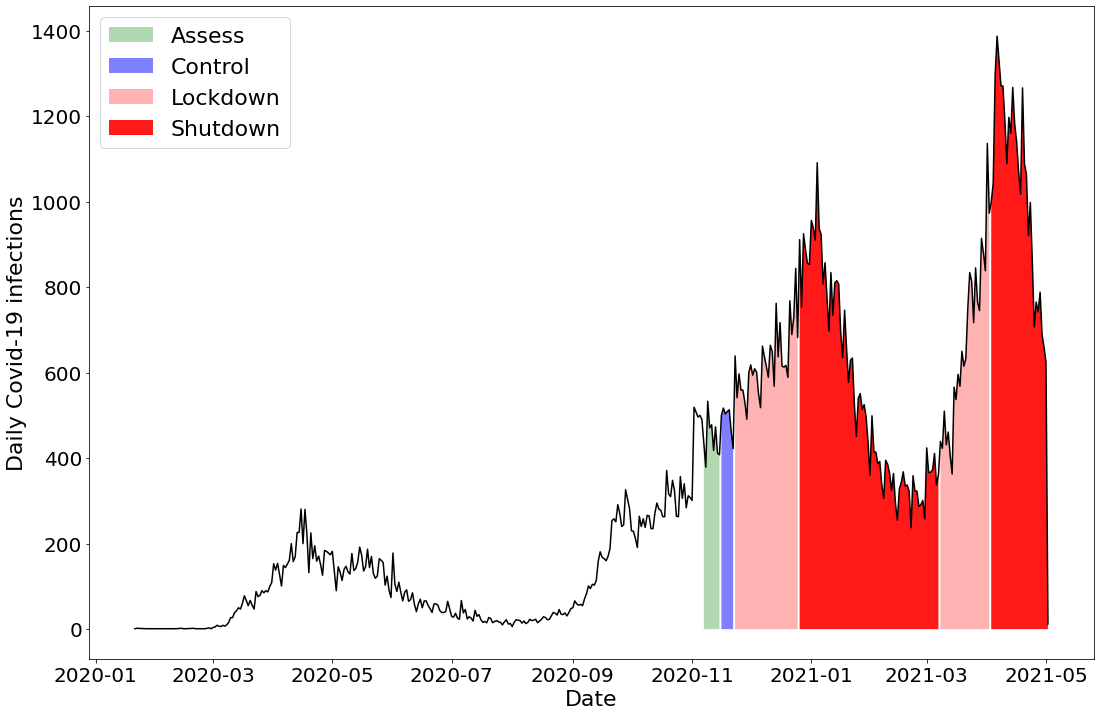

In [92]:
plt.figure(figsize=(18,12))
sns.lineplot(x=data_num['Accurate_date'],y=data_num['covid_number'],color='black')
plt.fill_between(x1['Accurate_date'],y1=x1['covid_number'],facecolor= 'g', alpha=0.3,label='Assess')
plt.fill_between(x2['Accurate_date'],y1=x2['covid_number'],facecolor= 'b', alpha=0.5,label='Control')
plt.fill_between(x3['Accurate_date'],y1=x3['covid_number'],facecolor= 'r', alpha=0.3,label='Lockdown')
plt.fill_between(x4['Accurate_date'],y1=x4['covid_number'],facecolor= 'r', alpha=0.9,label='Shutdown')
plt.fill_between(x5['Accurate_date'],y1=x5['covid_number'],facecolor= 'r', alpha=0.3)
plt.fill_between(x6['Accurate_date'],y1=x6['covid_number'],facecolor= 'r', alpha=0.9)
plt.xlabel('Date')
plt.ylabel('Daily Covid-19 infections')
#plt.xlim([0,1500])
#plt.title('Government Advice & Covid Numbers')
plt.legend()
plt.show()
#plt.savefig('series.png')

In [10]:
df_vacc = pd.read_csv('Vaccinationdata.csv',index_col=0) #CUMMULATIVE VACCINATION DATA FOR ONTARIO 

In [11]:
df_vacc.tail()

,_id,report_date,previous_day_doses_administered,total_doses_administered,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated
121,122,2021-04-29T00:00:00,120567.0,5027770,736806.0,368403.0
122,123,2021-04-30T00:00:00,112214.0,5139984,742220.0,371110.0
123,124,2021-05-01T00:00:00,107700.0,5247684,747118.0,373559.0
124,125,2021-05-02T00:00:00,76685.0,5324369,750560.0,375280.0
125,126,2021-05-03T00:00:00,53880.0,5378249,751810.0,375905.0


In [12]:
df_vacc['report_date'] = df_vacc['report_date'].str.split('T',expand=True)[0]

df_vacc['report_date']= pd.to_datetime(df_vacc['report_date'])

## VACCINE ADMINISTRATION ACROSS ONTARIO 

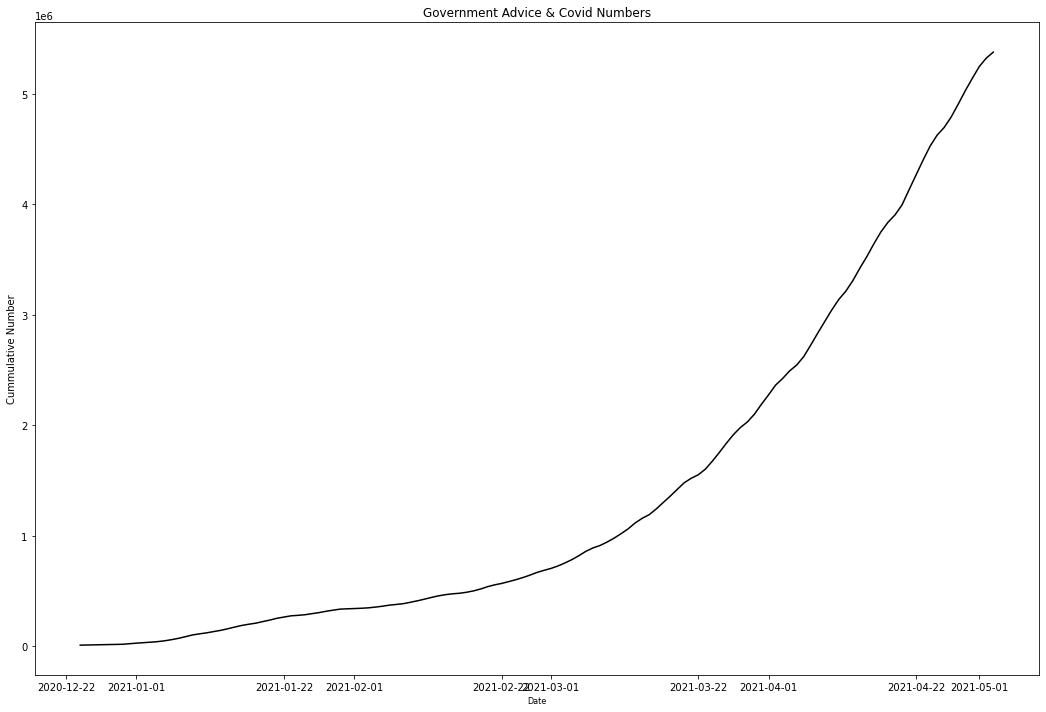

In [18]:
plt.figure(figsize=(18,12))
sns.lineplot(x=df_vacc['report_date'],y=df_vacc['total_doses_administered'],color='black')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Cummulative Number')
plt.title('Government Advice & Covid Numbers')
plt.show()

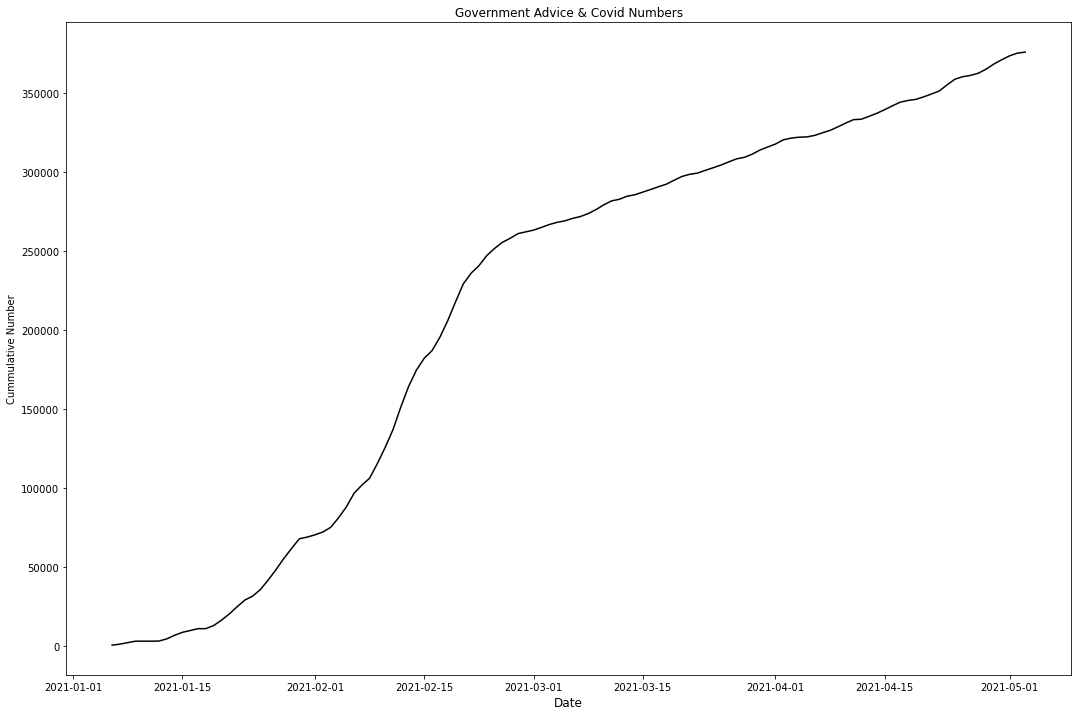

In [15]:
plt.figure(figsize=(18,12))
sns.lineplot(x=df_vacc['report_date'],y=df_vacc['total_individuals_fully_vaccinated'],color='black')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Cummulative Number')
plt.title('Government Advice & Covid Numbers')
plt.show()

# Modelling Toronto Data 

In [100]:
toronto_df1 = hosp_df[hosp_df['oh_region'] == 'TORONTO']

In [101]:
toronto_df2 = df_main[df_main['Reporting_PHU']=='Toronto Public Health']

In [102]:
df_toronto_status

,_id,Reporting_PHU,Reporting_PHU_id,Status_PHU,start_date,end_date,PHU_url
193,194,Toronto Public Health,3895,Other,2020-11-07,2020-11-15,http://www.toronto.ca/health/index.htm
194,195,Toronto Public Health,3895,Control,2020-11-16,2020-11-22,http://www.toronto.ca/health/index.htm
195,196,Toronto Public Health,3895,Lockdown,2020-11-23,2020-12-25,http://www.toronto.ca/health/index.htm
196,197,Toronto Public Health,3895,Shutdown,2020-12-26,2021-03-07,http://www.toronto.ca/health/index.htm
197,198,Toronto Public Health,3895,Lockdown,2021-03-08,2021-04-02,http://www.toronto.ca/health/index.htm
198,199,Toronto Public Health,3895,Shutdown,2021-04-03,2021-05-01,http://www.toronto.ca/health/index.htm


In [103]:
toronto_df3 = toronto_df2['Accurate_Episode_Date'].value_counts().reset_index()



In [104]:
toronto_df3 = toronto_df3.sort_values(by='index')

In [105]:
toronto_df3['report_date'] = pd.to_datetime(toronto_df3['index'])

In [106]:
toronto_df3

,index,Accurate_Episode_Date,report_date
436,2020-01-21,1,2020-01-21
430,2020-01-22,2,2020-01-22
441,2020-01-27,1,2020-01-27
435,2020-02-05,1,2020-02-05
438,2020-02-11,1,2020-02-11
...,...,...,...
48,2021-04-28,788,2021-04-28
67,2021-04-29,688,2021-04-29
71,2021-04-30,660,2021-04-30
82,2021-05-01,624,2021-05-01


In [107]:
len(df_toronto_status['start_date'])

6

In [108]:
toronto_df3

,index,Accurate_Episode_Date,report_date
436,2020-01-21,1,2020-01-21
430,2020-01-22,2,2020-01-22
441,2020-01-27,1,2020-01-27
435,2020-02-05,1,2020-02-05
438,2020-02-11,1,2020-02-11
...,...,...,...
48,2021-04-28,788,2021-04-28
67,2021-04-29,688,2021-04-29
71,2021-04-30,660,2021-04-30
82,2021-05-01,624,2021-05-01


In [109]:
toronto_df3['Cum_Covid_Numbers'] = toronto_df3['Accurate_Episode_Date'].cumsum()

In [110]:
toronto_df3

,index,Accurate_Episode_Date,report_date,Cum_Covid_Numbers
436,2020-01-21,1,2020-01-21,1
430,2020-01-22,2,2020-01-22,3
441,2020-01-27,1,2020-01-27,4
435,2020-02-05,1,2020-02-05,5
438,2020-02-11,1,2020-02-11,6
...,...,...,...,...
48,2021-04-28,788,2021-04-28,144015
67,2021-04-29,688,2021-04-29,144703
71,2021-04-30,660,2021-04-30,145363
82,2021-05-01,624,2021-05-01,145987


In [111]:
#toronto_df3.merge(df_toronto_status,how='cross', left_on='report_date', right_on='start_date')

In [112]:
print(dte)
print(dte2)

[Timestamp('2020-11-07 00:00:00'), Timestamp('2020-11-16 00:00:00'), Timestamp('2020-11-23 00:00:00'), Timestamp('2020-12-26 00:00:00'), Timestamp('2021-03-08 00:00:00'), Timestamp('2021-04-03 00:00:00')]
[Timestamp('2020-11-15 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-12-25 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-05-01 00:00:00')]


In [123]:
date_st = []
for i in range(len(dte)):
    date_st += list(pd.date_range(dte[i],dte2[i]))
    
#for item in date_st
    

In [127]:
df_adv  = pd.DataFrame({'dates':date_st, 'covid_advice':covid_stat})

In [128]:
len(dte)

6

In [129]:
covid_stat = []
for date_ in date_st:
    i=0
    while i < len(dte):
            if (date_ >= dte[i]) & (date_ <= dte2[i]):
                covid_stat.append(dte_stats[i])
                i = len(dte)
                #print(dte_stats[i])
            else:
                i+=1
                print(f'next time {i}')


next time 1
next time 1
next time 1
next time 1
next time 1
next time 1
next time 1
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 1
next time 2
next time 3
next time 1
next time 2
next time 3
next time 1
next time 2
next time 3
next time 1
next

In [130]:
len(covid_stat)

176

In [131]:
len(date_st)

176

In [132]:
df_adv

,dates,covid_advice
0,2020-11-07,Other
1,2020-11-08,Other
2,2020-11-09,Other
3,2020-11-10,Other
4,2020-11-11,Other
...,...,...
171,2021-04-27,Shutdown
172,2021-04-28,Shutdown
173,2021-04-29,Shutdown
174,2021-04-30,Shutdown


In [133]:
toronto_df3.columns

Index(['index', 'Accurate_Episode_Date', 'report_date', 'Cum_Covid_Numbers'], dtype='object')

In [134]:
list(pd.date_range(dte[1],dte2[1]))

[Timestamp('2020-11-16 00:00:00', freq='D'),
 Timestamp('2020-11-17 00:00:00', freq='D'),
 Timestamp('2020-11-18 00:00:00', freq='D'),
 Timestamp('2020-11-19 00:00:00', freq='D'),
 Timestamp('2020-11-20 00:00:00', freq='D'),
 Timestamp('2020-11-21 00:00:00', freq='D'),
 Timestamp('2020-11-22 00:00:00', freq='D')]

In [135]:
df_toronto_status['start_date'].iloc[5] == df_toronto_status['end_date'].iloc[0]

False

In [136]:
comb_df = toronto_df3.merge(df_adv,how='inner',left_on='report_date', right_on='dates')

In [137]:
comb_df1 = toronto_df1.merge(comb_df,how='inner',left_on='date', right_on='report_date')

In [138]:
df_comb = comb_df1.drop(['_id','icu_former_covid','icu_former_covid','index','report_date','dates','month','year'],axis=1)

In [139]:
df_comb.rename(columns={'Accurate_Episode_Date':'Daily_Covid_Num'},inplace=True)



In [140]:
df_comb #Full data for Toronto health region 

,date,oh_region,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid_vented,Daily_Covid_Num,Cum_Covid_Numbers,covid_advice
0,2020-11-07,TORONTO,10,6,74,16,10,4,435,31617,Other
1,2020-11-08,TORONTO,11,6,68,18,9,3,379,31996,Other
2,2020-11-09,TORONTO,10,5,66,17,8,3,533,32529,Other
3,2020-11-10,TORONTO,11,8,77,17,11,3,471,33000,Other
4,2020-11-11,TORONTO,11,9,72,17,11,2,478,33478,Other
...,...,...,...,...,...,...,...,...,...,...,...
171,2021-04-27,TORONTO,161,111,384,179,124,13,742,143227,Shutdown
172,2021-04-28,TORONTO,147,100,364,168,114,14,788,144015,Shutdown
173,2021-04-29,TORONTO,147,100,363,168,117,17,688,144703,Shutdown
174,2021-04-30,TORONTO,152,105,351,173,121,16,660,145363,Shutdown


In [141]:
df_vacc

,_id,report_date,previous_day_doses_administered,total_doses_administered,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated
0,1,2020-12-24,NaN,10756,NaN,NaN
1,2,2020-12-30,4595.0,18603,NaN,NaN
2,3,2020-12-31,5463.0,23502,NaN,NaN
3,4,2021-01-01,5415.0,28887,NaN,NaN
4,5,2021-01-02,4305.0,33191,NaN,NaN
...,...,...,...,...,...,...
121,122,2021-04-29,120567.0,5027770,736806.0,368403.0
122,123,2021-04-30,112214.0,5139984,742220.0,371110.0
123,124,2021-05-01,107700.0,5247684,747118.0,373559.0
124,125,2021-05-02,76685.0,5324369,750560.0,375280.0


In [142]:
dff = df_comb.merge(df_vacc,left_on='date',right_on='report_date')

In [143]:
dff.columns

Index(['date', 'oh_region', 'ICU', 'ICU_vented', 'hospitalizations',
       'icu_crci_total', 'icu_crci_total_vented', 'icu_former_covid_vented',
       'Daily_Covid_Num', 'Cum_Covid_Numbers', 'covid_advice', '_id',
       'report_date', 'previous_day_doses_administered',
       'total_doses_administered',
       'total_doses_in_fully_vaccinated_individuals',
       'total_individuals_fully_vaccinated'],
      dtype='object')

In [144]:
dff.head()

,date,oh_region,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid_vented,Daily_Covid_Num,Cum_Covid_Numbers,covid_advice,_id,report_date,previous_day_doses_administered,total_doses_administered,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated
0,2020-12-24,TORONTO,59,37,159,67,40,3,844,58584,Lockdown,1,2020-12-24,NaN,10756,NaN,NaN
1,2020-12-30,TORONTO,64,40,215,70,43,3,856,63599,Shutdown,2,2020-12-30,4595.0,18603,NaN,NaN
2,2020-12-31,TORONTO,70,43,212,75,44,1,853,64452,Shutdown,3,2020-12-31,5463.0,23502,NaN,NaN
3,2021-01-01,TORONTO,66,47,198,73,51,4,956,65408,Shutdown,4,2021-01-01,5415.0,28887,NaN,NaN
4,2021-01-02,TORONTO,65,44,203,71,46,2,938,66346,Shutdown,5,2021-01-02,4305.0,33191,NaN,NaN


In [145]:
dff.drop(['_id','report_date','previous_day_doses_administered','total_doses_in_fully_vaccinated_individuals'],inplace=True,axis=1)

In [146]:
dff['total_individuals_fully_vaccinated']= dff['total_individuals_fully_vaccinated'].replace(np.nan, 0)

In [153]:
dist_vac = pd.read_csv('aggregated_vaccine_numbers.csv',index_col=0)

In [170]:
dist_vac['People_vac_df7'].sum()

343125

In [175]:
dst_reg = dist_vac.groupby(['Region']).sum()['People_vac_df7']/ dist_vac['People_vac_df7'].sum()

In [178]:
dst_reg = dst_reg.reset_index()

In [179]:
dst_reg

,Region,People_vac_df7
0,Central,0.402445
1,East,0.167883
2,North,0.076468
3,Toronto,0.265996
4,West,0.087207


In [162]:
dist_vac.iloc[:,3:]/dist_vac.iloc[:,3:].sum()

,People_vac_df1,People_vac_df2,People_vac_df3,People_vac_df4,People_vac_df5,People_vac_df6,People_vac_df7
0,0.010504,0.006757,0.006757,0.010695,0.011100,0.010968,0.010891
1,0.013678,0.008498,0.008498,0.013615,0.013536,0.013354,0.013333
2,0.043902,0.027071,0.027071,0.042844,0.042596,0.042023,0.041693
3,0.008930,0.005506,0.005506,0.008715,0.008665,0.008548,0.008481
4,0.012076,0.007482,0.007482,0.011845,0.011776,0.011618,0.014336
5,0.008080,0.004982,0.004982,0.007885,0.009873,0.009741,0.009664
6,0.021377,0.013181,0.013181,0.020862,0.020741,0.020462,0.020302
7,0.053986,0.033289,0.033289,0.052685,0.052380,0.051675,0.051270
8,0.012266,0.007650,0.007650,0.012135,0.012068,0.012038,0.012643
9,0.006171,0.007539,0.007539,0.011932,0.011862,0.011703,0.011611


In [186]:
dst_reg[dst_reg['Region'] =='Toronto']['People_vac_df7'] #RATIO OF TORONTO TO ONTARIO POPULATION FULLY VACCINATED 

3    0.265996
Name: People_vac_df7, dtype: float64

In [189]:
dff['total_individuals_fully_vaccinated']= dff['total_individuals_fully_vaccinated'] * 0.26599

In [192]:
dff.to_csv('model_data/Torontoaggregated.csv') #Aggregated data for Toronto to use in modelling 

In [149]:
dff.columns

Index(['date', 'oh_region', 'ICU', 'ICU_vented', 'hospitalizations',
       'icu_crci_total', 'icu_crci_total_vented', 'icu_former_covid_vented',
       'Daily_Covid_Num', 'Cum_Covid_Numbers', 'covid_advice',
       'total_doses_administered', 'total_individuals_fully_vaccinated'],
      dtype='object')

In [ ]:
cols =['date','ICU', 'ICU_vented', 'hospitalizations','Daily_Covid_Num','Cum_Covid_Numbers','total_doses_administered', 'total_individuals_fully_vaccinated']

In [ ]:
dff.info()

In [ ]:
data_ = dff[cols]

In [ ]:
data_.set_index(['date'])

In [ ]:
# plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
# for i in range(1,len(cols)):
#     plt.subplot(4,2,i)
#     sns.lineplot(data[cols[0]],data[cols[i]], color='red', linewidth=1)
#     # Decorations
#     plt.title(cols[i])


In [ ]:
 ### Overall data frame

In [ ]:
hosp_df.columns

In [ ]:
df_agg1 = hosp_df.groupby(['date'])[['ICU', 'ICU_vented', 'hospitalizations',
       'icu_crci_total', 'icu_crci_total_vented', 'icu_former_covid',
       'icu_former_covid_vented']].sum()

In [ ]:
df_agg1 

In [ ]:
df_agg = df_agg1.merge(df_vacc, how='inner',left_index=True, right_on='report_date')

In [ ]:
df_agg = df_agg.drop(['_id','previous_day_doses_administered','total_doses_administered','icu_former_covid','icu_former_covid_vented'],axis=1)

In [ ]:
df_agg

In [ ]:
list(df_agg.columns)

In [ ]:
cols = ['report_date','ICU',
 'ICU_vented',
 'hospitalizations',
 'icu_crci_total',
 'icu_crci_total_vented',
 'total_doses_in_fully_vaccinated_individuals',
 'total_individuals_fully_vaccinated']

In [ ]:
df_agg= df_agg[cols]
df_agg

In [ ]:
cvd_df = dff.groupby(['date']).sum()[['Daily_Covid_Num','Cum_Covid_Numbers']]

In [ ]:
df_agg = df_agg.merge(cvd_df, how='inner',left_on='report_date',right_index=True)

In [ ]:
df_agg.info()

In [ ]:
plt.figure(figsize=(20,14))
sns.lineplot(x='report_date',y='Daily_Covid_Num', data=df_agg,marker='*')
sns.lineplot(x=df_agg['report_date'],y=df_agg['total_individuals_fully_vaccinated'] - df_agg['total_individuals_fully_vaccinated'].shift(1),markers=True,color='red')

plt.xlabel('Date')
plt.ylabel('Daily Covid-19 infections')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(20,14))
sns.lineplot(x='report_date',y='total_individuals_fully_vaccinated', data=df_agg,markers=True,color='black')
sns.lineplot(x=df_agg['report_date'],y=df_agg['Cum_Covid_Numbers'],markers=True,color='red')

plt.xlabel('Date')
plt.ylabel('Daily Covid-19 infections')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
#df_agg.to_csv('model_data/aggregateddata.csv')

In [ ]:
df_agg['total_individuals_fully_vaccinated'].shift(1)

In [ ]:
df_agg['total_individuals_fully_vaccinated'] - df_agg['total_individuals_fully_vaccinated'].shift(1)

In [ ]:
dfr = pd.read_csv('city_healthregion.csv')
dfr.head()

In [ ]:
dfr2 = dfr[~dfr['Aff_region'].str.contains('Integration',regex=True)]

In [ ]:
dfr2.info()

In [ ]:
#dfr2['Population']=dfr2['Population'].replace(',','')

In [ ]:
dfr2['Population']= dfr2['Population'].apply(lambda x: x.replace(',',''))

In [ ]:
dfr2['Population']= dfr2['Population'].astype(int)

In [ ]:
100* dfr2.groupby(['mapped_region']).sum()/dfr2.groupby(['mapped_region']).sum().sum()

In [ ]:
df_main[df_main['Reporting_PHU']=='Chatham-Kent Health Unit']

In [ ]:
worker = df_main[['Reporting_PHU','Reporting_PHU_ID']].drop_duplicates(keep='first')

In [ ]:
worker['key'] = worker['Reporting_PHU'].apply(lambda x: x.replace(',','')).str.split(' ', expand=True)[0]

In [ ]:
a= worker.sort_values('Reporting_PHU_ID')

In [ ]:
a

In [ ]:
PHU_ID = [2226,2227,2230,2233,2233]

In [ ]:
a['Reporting_PHU_ID'].tolist()

In [ ]:
mapped = ['North','Central','Central','West','Central','Central','Central','Central','East','West','West','East','West','East','West','Central','North','North','East','Central','Central','North','East','East','Central','North','North','North','East','Central','West','Central','West','Toronto']

In [ ]:
len(mapped)

In [ ]:
df_main[[]]

In [ ]:
dfr['Aff_region'].unique()